In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rab_with_db

# Сколько игр у каждого игрока. Гистограмма

In [2]:
rwd = rab_with_db.DbConnection("shogi_db10000.db")
game_for_player = []
player_table = rwd.table_list("Player")
for i in player_table:
    players_kifu_list = rwd.players_kifu_list(i[0],False)
    game_for_player.append(len(players_kifu_list))
    players_kifu_list = list(map(lambda x:x[1],players_kifu_list))

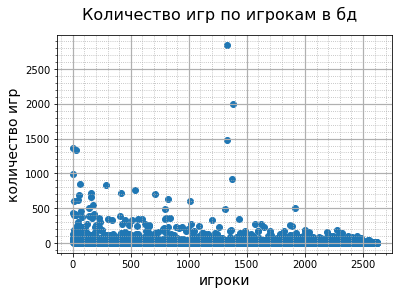

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("Количество игр по игрокам в бд", fontsize=16)
ax.set_xlabel("игроки", fontsize=14)
ax.set_ylabel("количество игр", fontsize=14)
ax.minorticks_on()
ax.grid(which="major",linewidth=1.2)
ax.grid(which="minor",linestyle = ':')
ax.scatter(range(len(game_for_player)),game_for_player)
plt.show()

In [ ]:
print("больше 100", sum(map(lambda x: x>100,game_for_player)), "шт.")
print("больше 200", sum(map(lambda x: x>200,game_for_player)), "шт.")
print("больше 500", sum(map(lambda x: x>500,game_for_player)), "шт.")

больше 100 171 шт.
больше 200 82 шт.
больше 500 21 шт.


# Cколько игр между собой у пары из двух игроков

In [3]:
pdict = {}
part = rwd.table_list("Participation")
stack = [(0,0,0)]
for p in part:
    pid,pid_p,pid_k = p
    last_pop = stack.pop()
    if last_pop[-1] == pid_k:
        a = min(last_pop[1],pid_p)
        b = max(last_pop[1],pid_p)
        if not ((a,b) in pdict.keys()):
            pdict[(a,b)] = []
        pdict[(a,b)].append(pid_k)
    else:
        stack.append(last_pop)
        stack.append(p)
print(len(pdict), "пар игроков")

19243 пар игроков


In [4]:
keys_for_delite = []
for k,v in pdict.items():
    if len(v) == 1:
        keys_for_delite.append(k)
for k in keys_for_delite:
    pdict.pop(k)
print(len(pdict),"пар с количеством игр > 1")

6329 пар с количеством игр > 1


In [ ]:
temp_x = list(set(list(map(lambda x:len(x),pdict.values()))))
temp_y = [0]*len(temp_x)
for k,v in pdict.items():
    temp_y[temp_x.index(len(v))] += 1

In [ ]:
print(temp_x)
print(temp_y)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 54, 56, 58, 60, 61, 65, 66, 200, 73, 74, 75, 89, 92, 95, 96, 99]
[3134, 1226, 613, 366, 233, 158, 107, 79, 56, 40, 38, 30, 32, 28, 18, 15, 15, 16, 11, 9, 9, 6, 4, 8, 6, 8, 1, 2, 4, 2, 3, 3, 4, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1]


In [ ]:
print(temp_x.index(52))

49


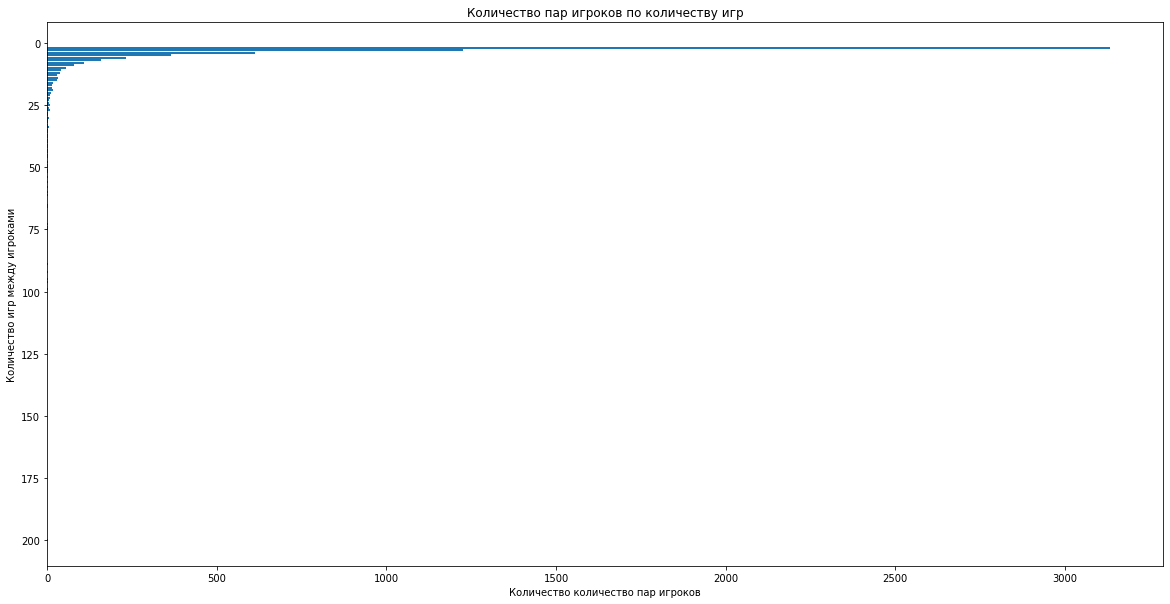

In [ ]:
plt.figure(figsize=(20.,10.))
plt.title("Количество пар игроков по количеству игр")
plt.ylabel("Количество игр между игроками")
plt.xlabel("Количество количество пар игроков")
plt.barh(temp_x,temp_y)
plt.gca().invert_yaxis()

# Cколько повторений определенной позиции

In [5]:
import shogi.KIF
import rab_with_db

In [6]:
rwd = rab_with_db.DbConnection("shogi_db10000.db")
kf_list = rwd.table_list("Kifu")
pos_dict = {}

In [ ]:
pos_dict.clear()
for i_kifu in range(len(kf_list)):
# for i_kifu in range(10):
    try:
        kif = shogi.KIF.Parser.parse_str(kf_list[i_kifu][1])[0]
        board = shogi.Board()
        for i in range(len(kif['moves'])):
            board.push_usi(kif['moves'][i])
            # pos = board.sfen()[::-1].split(' ',2)[-1][::-1]
            pos = board.sfen()
            if pos in pos_dict.keys():
                pos_dict[pos] += 1
            else:
                pos_dict[pos] = 1
    except Exception as ex:
        print(str(i_kifu), end=' ')

# 7 мин

KeyboardInterrupt: 

In [ ]:
len(pos_dict)

2956224

In [ ]:
pos_dict_short = pos_dict.copy()

keys_for_delite = []
for k,v in pos_dict.items():
    if v < 5000:
        keys_for_delite.append(k)

for k in keys_for_delite:
    pos_dict_short.pop(k)

print(len(pos_dict_short))

6


In [ ]:
board = shogi.Board()
for p in pos_dict_short:
    board.set_sfen(p)
    print(board.kif_str())

後手の持駒：
  ９ ８ ７ ６ ５ ４ ３ ２ １
+---------------------------+
|v香v桂v銀v金v玉v金v銀v桂v香|一
| ・v飛 ・ ・ ・ ・ ・v角 ・|二
|v歩v歩v歩v歩v歩v歩v歩v歩v歩|三
| ・ ・ ・ ・ ・ ・ ・ ・ ・|四
| ・ ・ ・ ・ ・ ・ ・ ・ ・|五
| ・ ・ 歩 ・ ・ ・ ・ ・ ・|六
| 歩 歩 ・ 歩 歩 歩 歩 歩 歩|七
| ・ 角 ・ ・ ・ ・ ・ 飛 ・|八
| 香 桂 銀 金 玉 金 銀 桂 香|九
+---------------------------+
先手の持駒：
後手の持駒：
  ９ ８ ７ ６ ５ ４ ３ ２ １
+---------------------------+
|v香v桂v銀v金v玉v金v銀v桂v香|一
| ・v飛 ・ ・ ・ ・ ・v角 ・|二
|v歩v歩v歩v歩v歩v歩 ・v歩v歩|三
| ・ ・ ・ ・ ・ ・v歩 ・ ・|四
| ・ ・ ・ ・ ・ ・ ・ ・ ・|五
| ・ ・ 歩 ・ ・ ・ ・ ・ ・|六
| 歩 歩 ・ 歩 歩 歩 歩 歩 歩|七
| ・ 角 ・ ・ ・ ・ ・ 飛 ・|八
| 香 桂 銀 金 玉 金 銀 桂 香|九
+---------------------------+
先手の持駒：
後手の持駒：
  ９ ８ ７ ６ ５ ４ ３ ２ １
+---------------------------+
|v香v桂v銀v金v玉v金v銀v桂v香|一
| ・v飛 ・ ・ ・ ・ ・v角 ・|二
|v歩v歩v歩v歩v歩v歩 ・v歩v歩|三
| ・ ・ ・ ・ ・ ・v歩 ・ ・|四
| ・ ・ ・ ・ ・ ・ ・ ・ ・|五
| ・ ・ 歩 ・ ・ ・ ・ 歩 ・|六
| 歩 歩 ・ 歩 歩 歩 歩 ・ 歩|七
| ・ 角 ・ ・ ・ ・ ・ 飛 ・|八
| 香 桂 銀 金 玉 金 銀 桂 香|九
+---------------------------+
先手の持駒：
後手の持駒：
  ９ ８ ７ ６ ５ ４ ３ ２ １
+---------------------------+
|v香v桂v銀v金v玉v金v銀v桂v香|一
| ・v飛 ・ ・ ・ ・ ・v角 ・|二
|v歩v歩v歩v歩v歩v歩v歩v歩v歩|三
|

# Матрица побед/игр на тех, у кого много игр

In [7]:
import pandas as pd

In [8]:
index = []
for k,v in pdict.items():
    if len(v) > 50:
        index.append(k[0])
        index.append(k[1])
        # print(k[0],k[1])
index = list(set(index))
print(len(index))
index.sort()

27


In [9]:
matr = pd.DataFrame(data=np.zeros((len(index),len(index))),
                    index=index,
                    columns=index,
                    dtype=int)

matr['Total'] = [0] * len(index)

In [ ]:
elo = [1300] * len(index)
K1 = 32 # 200 < x < 2300
K2 = 20 # 2300 < x < 2400, 100 < x < 200
K3 = 10 # x > 2400, x < 100
Sb = 0
Sw = 0
games_order = []
for v in pdict.values():
    if len(v) > 50:
        games_order.extend(v)
games_order = dict.fromkeys(list(set(games_order)))

In [ ]:
for k,v in pdict.items():
    if len(v) > 50:
        i = index.index(k[0])
        j = index.index(k[1])       
        i_win = 0
        j_win = 0
        for kifu_game in v:
            games_order[kifu_game] = k
            try:
                kif_ind = [a for a,b in enumerate(kf_list) if b[0] == kifu_game][0]
                kif = shogi.KIF.Parser.parse_str(kf_list[kif_ind][1])[0]
                win_b = ''
                win_w = ''
                for ind, login in player_table:
                    if login == kif['names'][shogi.BLACK]:
                        win_b = ind
                    if login == kif['names'][shogi.WHITE]:
                        win_w = ind
                if kif['win'] == 'b':
                    if k[0] == win_b:
                        i_win += 1
                    elif k[1] == win_b:
                        j_win += 1
                    else:
                        i_win += 0.5
                        j_win += 0.5
                else:
                    if k[0] == win_w:
                        i_win += 1
                    elif k[1] == win_w:
                        j_win += 1
                    else:
                        i_win += 0.5
                        j_win += 0.5
            except Exception as ex:
                # print(str(i_kifu), end=' ')
                pass
        matr.iloc[i,j] += i_win
        matr.iloc[j,i] += j_win
        matr.iloc[i,-1] += i_win + j_win
        matr.iloc[j,-1] += i_win + j_win

In [ ]:
for kifu_game in sorted(games_order.keys()):
    i = index.index(games_order[kifu_game][0])
    j = index.index(games_order[kifu_game][1])
    try:
        kif_ind = [a for a,b in enumerate(kf_list) if b[0] == kifu_game][0]
        kif = shogi.KIF.Parser.parse_str(kf_list[kif_ind][1])[0]
        win_b = ''
        win_w = ''
        for ind, login in player_table:
            if login == kif['names'][shogi.BLACK]:
                win_b = ind
            if login == kif['names'][shogi.WHITE]:
                win_w = ind
        Eb = 1.0 / (1+pow(10,(elo[index.index(win_b)]-elo[index.index(win_w)])/400))
        Ew = 1.0 / (1+pow(10,(elo[index.index(win_w)]-elo[index.index(win_b)])/400))
        if kif['win'] == 'b':
            if games_order[kifu_game][0] == win_b:
                Sb = 1
                Sw = 0
            elif games_order[kifu_game][1] == win_b:
                Sb = 1
                Sw = 0
            else:
                Sb = 0.5
                Sw = 0.5
        else:
            if games_order[kifu_game][0] == win_w:
                Sw = 1
                Sb = 0
            elif games_order[kifu_game][1] == win_w:
                Sw = 1
                Sb = 0
            else:
                Sb = 0.5
                Sw = 0.5
        if 200 < elo[index.index(win_b)] <= 2300:
            elo[index.index(win_b)] += K1*(Sb - Eb)
        elif 2300 < elo[index.index(win_b)] <= 2400 or 100 < elo[index.index(win_b)] <= 200:
            elo[index.index(win_b)] += K2*(Sb - Eb)
        elif elo[index.index(win_b)] > 2400 or elo[index.index(win_b)] <= 100:
            elo[index.index(win_b)] += K3*(Sb - Eb)

        if 200 < elo[index.index(win_w)] <= 2300:
            elo[index.index(win_w)] += K1*(Sw - Ew)
        elif 2300 < elo[index.index(win_w)] <= 2400 or 100 < elo[index.index(win_w)] <= 200:
            elo[index.index(win_w)] += K2*(Sw - Ew)
        elif elo[index.index(win_w)] > 2400 or elo[index.index(win_w)] <= 100:
            elo[index.index(win_w)] += K3*(Sw - Ew)
    except Exception as ex:
        # print(str(i_kifu), end=' ')
        pass

In [ ]:
total_by_rows = []
for i in range(len(index)):
    res = round(sum(matr.iloc[i,:-1])/matr.iloc[i,-1],4)
    total_by_rows.append(res * 100)

matr['Percentage'] = total_by_rows
matr['Elo'] = list(map(lambda x:round(x),elo))

In [10]:
elo = [1300] * len(index)
K = 16
Sb = 0
Sw = 0
games_order = []
for v in pdict.values():
    if len(v) > 50:
        games_order.extend(v)
games_order = dict.fromkeys(list(set(games_order)))

for k,v in pdict.items():
    if len(v) > 50:
        i = index.index(k[0])
        j = index.index(k[1])       
        i_win = 0
        j_win = 0
        for kifu_game in v:
            games_order[kifu_game] = k
            try:
                kif_ind = [a for a,b in enumerate(kf_list) if b[0] == kifu_game][0]
                kif = shogi.KIF.Parser.parse_str(kf_list[kif_ind][1])[0]
                win_b = ''
                win_w = ''
                for ind, login in player_table:
                    if login == kif['names'][shogi.BLACK]:
                        win_b = ind
                    if login == kif['names'][shogi.WHITE]:
                        win_w = ind
                if kif['win'] == 'b':
                    if k[0] == win_b:
                        i_win += 1
                    elif k[1] == win_b:
                        j_win += 1
                    else:
                        i_win += 0.5
                        j_win += 0.5
                else:
                    if k[0] == win_w:
                        i_win += 1
                    elif k[1] == win_w:
                        j_win += 1
                    else:
                        i_win += 0.5
                        j_win += 0.5
            except Exception as ex:
                print(str(i_kifu), end=' ')
                # pass
        matr.iloc[i,j] += i_win
        matr.iloc[j,i] += j_win
        matr.iloc[i,-1] += i_win + j_win
        matr.iloc[j,-1] += i_win + j_win

for kifu_game in sorted(games_order.keys()):
    i = index.index(games_order[kifu_game][0])
    j = index.index(games_order[kifu_game][1])
    try:
        kif_ind = [a for a,b in enumerate(kf_list) if b[0] == kifu_game][0]
        kif = shogi.KIF.Parser.parse_str(kf_list[kif_ind][1])[0]
        win_b = ''
        win_w = ''
        for ind, login in player_table:
            if login == kif['names'][shogi.BLACK]:
                win_b = ind
            if login == kif['names'][shogi.WHITE]:
                win_w = ind
        Eb = 1.0 / (1+pow(10,(elo[index.index(win_b)]-elo[index.index(win_w)])/400))
        Ew = 1.0 / (1+pow(10,(elo[index.index(win_w)]-elo[index.index(win_b)])/400))
        if kif['win'] == 'b':
            if games_order[kifu_game][0] == win_b:
                Sb = 1
                Sw = 0
            elif games_order[kifu_game][1] == win_b:
                Sb = 1
                Sw = 0
            else:
                Sb = 0.5
                Sw = 0.5
        else:
            if games_order[kifu_game][0] == win_w:
                Sw = 1
                Sb = 0
            elif games_order[kifu_game][1] == win_w:
                Sw = 1
                Sb = 0
            else:
                Sb = 0.5
                Sw = 0.5
        elo[index.index(win_b)] += K*(Sb - Eb)
        elo[index.index(win_w)] += K*(Sw - Ew)
    except Exception as ex:
        print(str(i_kifu), end=' ')
        # pass

total_by_rows = []
for i in range(len(index)):
    res = round(sum(matr.iloc[i,:-1])/matr.iloc[i,-1],4)
    total_by_rows.append(res * 100)

matr['Percentage'] = total_by_rows
matr['Elo'] = list(map(lambda x:round(x),elo))

## понять, какой вариант расчета правильный

In [11]:
matr

,1,7,9,29,66,159,187,204,304,407,...,1377,1379,1432,1438,1785,2032,2191,Total,Percentage,Elo
1,0,0,0,0,0,39,0,0,0,0,...,0,0,0,0,0,0,0,75,52.00,1771
7,0,0,0,0,0,0,0,0,0,0,...,0,58,0,0,0,0,0,170,72.94,3013
9,0,0,0,0,0,0,0,0,0,43,...,0,0,0,0,0,0,0,65,66.15,1798
29,0,0,0,0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,56,67.86,1822
66,0,0,0,18,0,0,49,0,0,0,...,0,0,0,0,0,0,0,151,44.37,208
159,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,75,48.00,829
187,0,0,0,0,46,0,0,0,0,0,...,0,0,0,0,0,0,0,95,48.42,1870
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,75,57.33,1965
304,0,0,0,0,0,0,0,0,0,0,...,0,39,0,0,0,0,0,118,79.66,2742
407,0,0,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,65,33.85,802


In [12]:
last_game = dict.fromkeys(matr.index)

Взять игры по одному игроку и посчитать по ходам, когда он увеличивает свой выигрыш, когда уменьшает (дельта cp). Добавить в таблицу сравнения

In [13]:
matr['cp up count, %'] = [0] * len(index)
matr['cp down count, %'] = [0] * len(index)
matr['total count of moves'] = [0] * len(index)
matr['cp up'] = [0] * len(index)
matr['cp down'] = [0] * len(index)
matr['delta cp with pv_cp'] = [0] * len(index)

for k,v in pdict.items():
    if len(v) > 50:
        b_ind = None
        w_ind = None
        i_cp = 0
        j_cp = 0
        for kifu_game in v:
            games_order[kifu_game] = k
            try:
                kif_ind = [a for a,b in enumerate(kf_list) if b[0] == kifu_game][0]
                kif = shogi.KIF.Parser.parse_str(kf_list[kif_ind][1])[0]
                last_game[k[0]] = [kif, k, v, kifu_game]
                last_game[k[1]] = [kif, k, v, kifu_game]
                for ind, login in player_table:
                    if login == kif['names'][shogi.BLACK]:
                        b_ind = ind
                    if login == kif['names'][shogi.WHITE]:
                        w_ind = ind
                if k[0] == b_ind:
                    i_cp = rwd.get_cp(kifu_game, 0)
                    j_cp = rwd.get_cp(kifu_game, 1)
                elif k[1] == b_ind:
                    i_cp = rwd.get_cp(kifu_game, 1)
                    j_cp = rwd.get_cp(kifu_game, 0)

                temp_cp = 0
                for ind in range(len(kif['moves'])):
                    if ind%2 == 0:
                        if ind//2 < len(i_cp):
                            matr.loc[k[0], 'delta cp with pv_cp'] -= i_cp[ind//2][1] - i_cp[ind//2][2]                        
                            if k[0] == b_ind:
                                delta_cp = i_cp[ind//2][2] - temp_cp
                                if delta_cp >= 0:
                                    matr.loc[k[0], 'cp up'] += delta_cp
                                    matr.loc[k[0], 'cp up count, %'] += 1
                                else:
                                    matr.loc[k[0], 'cp down'] += delta_cp
                                    matr.loc[k[0], 'cp down count, %'] += 1
                                temp_cp = -i_cp[ind//2][2]
                            else:
                                delta_cp = j_cp[ind//2][2] - temp_cp
                                if delta_cp >= 0:
                                    matr.loc[k[1], 'cp up'] += delta_cp
                                    matr.loc[k[1], 'cp up count, %'] += 1
                                else:
                                    matr.loc[k[1], 'cp down'] += delta_cp
                                    matr.loc[k[1], 'cp down count, %'] += 1
                                temp_cp = -j_cp[ind//2][2]
                    else:
                        matr.loc[k[1], 'delta cp with pv_cp'] -= j_cp[ind//2][1] - j_cp[ind//2][2]
                        if k[0] == b_ind:
                            delta_cp = j_cp[ind//2][2] - temp_cp
                            if delta_cp >= 0:
                                matr.loc[k[1], 'cp up'] += delta_cp
                                matr.loc[k[1], 'cp up count, %'] += 1
                            else:
                                matr.loc[k[1], 'cp down'] += delta_cp
                                matr.loc[k[1], 'cp down count, %'] += 1
                            temp_cp = -j_cp[ind//2][2]
                        else:
                            delta_cp = i_cp[ind//2][2] - temp_cp
                            if delta_cp >= 0:
                                matr.loc[k[0], 'cp up'] += delta_cp
                                matr.loc[k[0], 'cp up count, %'] += 1
                            else:
                                matr.loc[k[0], 'cp down'] += delta_cp
                                matr.loc[k[0], 'cp down count, %'] += 1
                            temp_cp = -i_cp[ind//2][2]
                matr.loc[k[0], 'total count of moves'] += len(i_cp)
                matr.loc[k[1], 'total count of moves'] += len(j_cp)
            except Exception as ex:
                print(str(ex), end=' ')
                # pass
matr['aver cp up'] = round(matr['cp up'] / matr['cp up count, %'])
matr['aver cp down'] = round(matr['cp down'] / matr['cp down count, %'])
matr['cp up count, %'] = round((matr['cp up count, %'] / matr['total count of moves'])*100)
matr['cp down count, %'] = round((matr['cp down count, %'] / matr['total count of moves'])*100)
matr['delta cp with pv_cp'] = matr['delta cp with pv_cp'] / matr['total count of moves'] # per move

# 57 мин

In [14]:
matr

,1,7,9,29,66,159,187,204,304,407,...,Percentage,Elo,"cp up count, %","cp down count, %",total count of moves,cp up,cp down,delta cp with pv_cp,aver cp up,aver cp down
1,0,0,0,0,0,39,0,0,0,0,...,52.00,1771,46.0,54.0,3535,234233,-1133283,-311.470438,145.0,-591.0
7,0,0,0,0,0,0,0,0,0,0,...,72.94,3013,47.0,53.0,10245,566536,-3581421,-353.814934,117.0,-665.0
9,0,0,0,0,0,0,0,0,0,43,...,66.15,1798,34.0,66.0,2153,60708,-670829,-310.008825,84.0,-469.0
29,0,0,0,0,38,0,0,0,0,0,...,67.86,1822,46.0,54.0,2324,121607,-645811,-267.746558,115.0,-511.0
66,0,0,0,18,0,0,49,0,0,0,...,44.37,208,40.0,60.0,6880,364282,-2472157,-351.789971,134.0,-596.0
159,36,0,0,0,0,0,0,0,0,0,...,48.00,829,45.0,55.0,3535,223835,-1148981,-296.604809,142.0,-592.0
187,0,0,0,0,46,0,0,0,0,0,...,48.42,1870,42.0,58.0,4571,252152,-1700043,-366.388318,132.0,-647.0
204,0,0,0,0,0,0,0,0,0,0,...,57.33,1965,40.0,60.0,4089,173736,-2077526,-518.794082,107.0,-841.0
304,0,0,0,0,0,0,0,0,0,0,...,79.66,2742,47.0,53.0,6377,352386,-1809411,-276.970989,118.0,-532.0
407,0,0,22,0,0,0,0,0,0,0,...,33.85,802,39.0,61.0,2141,81571,-588488,-284.621205,99.0,-452.0


## добавить апроксимацию прямой методом наименьших квадратов...

(array([0.01782551]), array([48196.87044692]), 1, array([11880.38972425]))
(array([-0.09466245]), array([4155493.15196888]), 1, array([11880.38972425]))
(array([0.03329553]), array([225899.22051753]), 1, array([11880.38972425]))
(array([-0.17532052]), array([15205389.08729248]), 1, array([11880.38972425]))


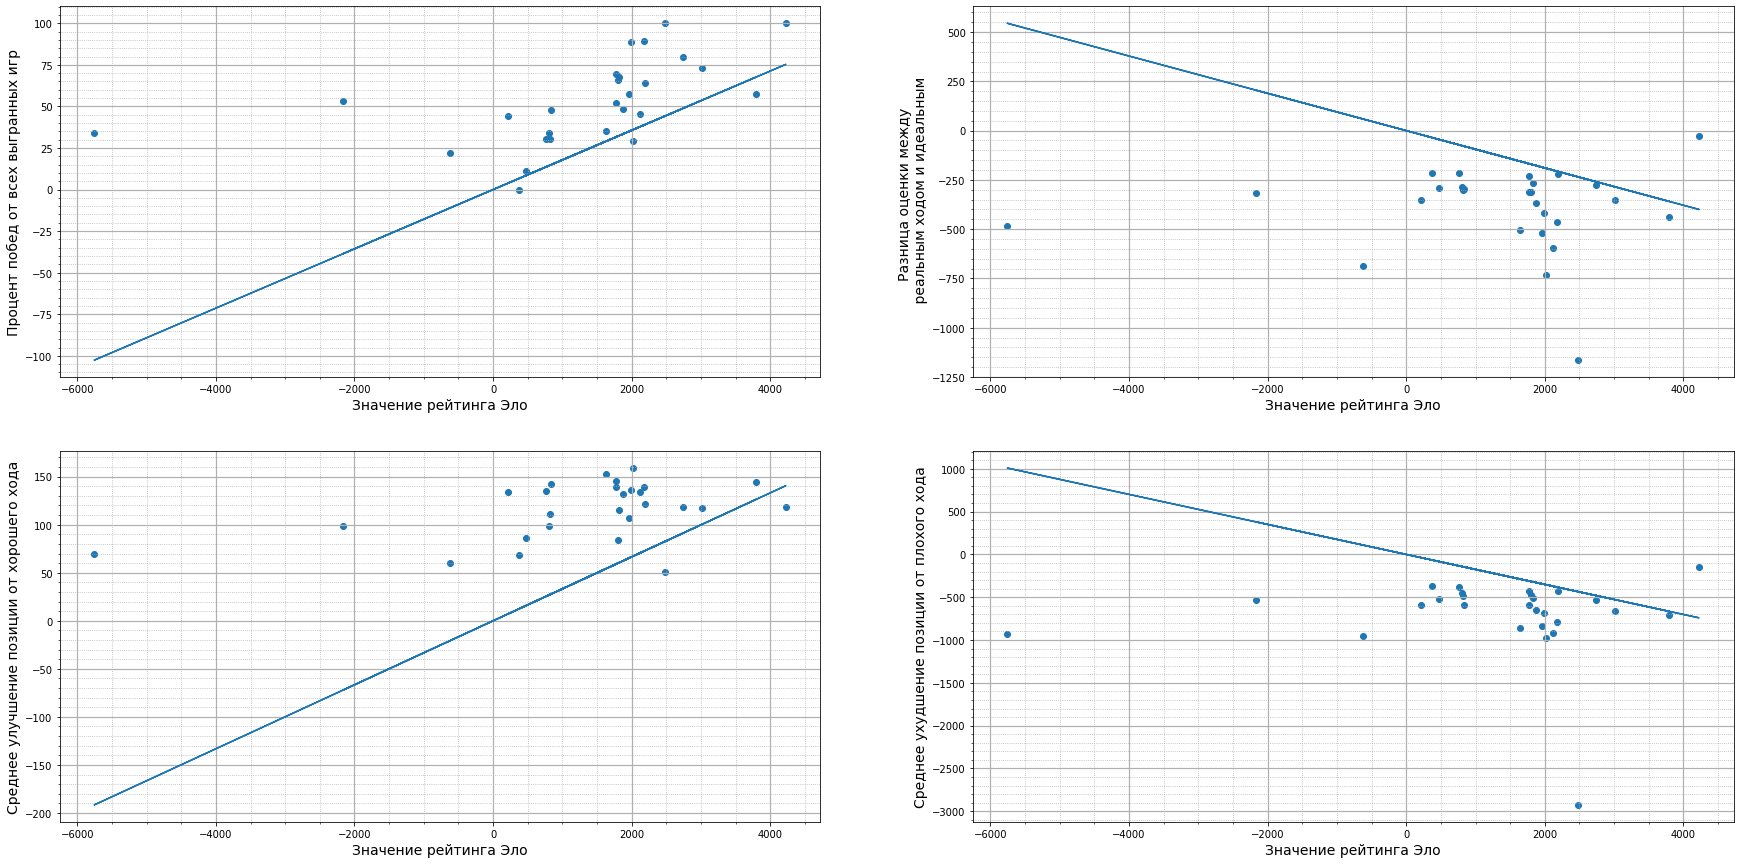

In [28]:
fig, axes = plt.subplots(2,2,figsize=(30,15))
# fig.suptitle("Сравнение рейтингов", fontsize=16)
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel("Значение рейтинга Эло", fontsize=14)
        axes[i,j].minorticks_on()
        axes[i,j].grid(which="major",linewidth=1.2)
        axes[i,j].grid(which="minor",linestyle = ':')
# axes[0,0].set_title('а)')
axes[0,0].set_ylabel("Процент побед от всех выгранных игр", fontsize=14)
axes[0,0].scatter(matr.Elo,matr['Percentage'])
lss = np.linalg.lstsq(list(map(lambda x:[x,], matr.Elo)), list(matr['Percentage']), rcond=-1)
print(lss)
axes[0,0].plot(matr.Elo,list(map(lambda x: x*lss[0][0],matr.Elo)))

# # axes[0,1].set_title('б)')
# axes[0,1].set_ylabel("Процент хороших ходов", fontsize=14)
# axes[0,1].scatter(matr.Elo,matr['cp up count, %'])
# lss = np.linalg.lstsq(list(map(lambda x:[x,], matr.Elo)), list(matr['cp up count, %']), rcond=-1)
# print(lss)
# axes[0,1].plot(matr.Elo,list(map(lambda x: x*lss[0][0],matr.Elo)))

# axes[0,2].set_title('cp down count, %')
# axes[0,2].scatter(matr.Elo,matr['cp down count, %'])

# axes[0,2].set_title('в)')
axes[0,1].set_ylabel("Разница оценки между \n реальным ходом и идеальным", fontsize=14)
axes[0,1].scatter(matr.Elo,matr['delta cp with pv_cp'])
lss = np.linalg.lstsq(list(map(lambda x:[x,], matr.Elo)), list(matr['delta cp with pv_cp']), rcond=-1)
print(lss)
axes[0,1].plot(matr.Elo,list(map(lambda x: x*lss[0][0],matr.Elo)))

# axes[1,0].set_title('г)')
axes[1,0].set_ylabel("Среднее улучшение позиции от хорошего хода", fontsize=14)
axes[1,0].scatter(matr.Elo,matr['aver cp up'])
lss = np.linalg.lstsq(list(map(lambda x:[x,], matr.Elo)), list(matr['aver cp up']), rcond=-1)
print(lss)
axes[1,0].plot(matr.Elo,list(map(lambda x: x*lss[0][0],matr.Elo)))

# axes[1,1].set_title('д)')
axes[1,1].set_ylabel("Среднее ухудшение позиции от плохого хода", fontsize=14)
axes[1,1].scatter(matr.Elo,matr['aver cp down'])
lss = np.linalg.lstsq(list(map(lambda x:[x,], matr.Elo)), list(matr['aver cp down']), rcond=-1)
print(lss)
axes[1,1].plot(matr.Elo,list(map(lambda x: x*lss[0][0],matr.Elo)))

plt.show()

# Повторяем подход Фириеры

In [ ]:
print(last_game)

In [16]:
from scipy.stats import norm

In [32]:
ferreira = matr.copy()
ferreira = ferreira.drop(['Percentage', 'cp up count, %', 'cp down count, %', 'total count of moves'], axis=1)
ferreira = ferreira.drop(['cp up', 'cp down', 'delta cp with pv_cp', 'aver cp down', 'aver cp up', 'Total'], axis=1)
for i in range(len(matr)):
    for j in range(len(matr)):
        ferreira.iloc[i,j] = 0

In [33]:
ferreira

,1,7,9,29,66,159,187,204,304,407,...,1329,1330,1377,1379,1432,1438,1785,2032,2191,Elo
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1771
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3013
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1798
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1822
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,208
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,829
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1870
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1965
304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2742
407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,802


In [19]:
def ver_raspr_rasn(fx, fy, n):
    sum = 0
    for m in range(-2*max(len(fx), len(fy)), 2*max(len(fx), len(fy))+1):
        if m in fy and n+m in fx:
            sum += fy[m]*fx[n+m]
    return sum

In [41]:
for k in last_game.keys():
    first_name = ''
    second_name = ''
    first_ind = 0
    second_ind = 0
    first_pl_strength = []
    second_pl_strength = []

    b_ind = None
    w_ind = None
    for ind, login in player_table:
        if login == last_game[k][0]['names'][shogi.BLACK]:
            b_ind = ind
            first_name = login
            first_ind = ind
        if login == last_game[k][0]['names'][shogi.WHITE]:
            w_ind = ind
            second_name = login
            second_ind = ind
    if last_game[k][1][0] == b_ind:
        i_cp = rwd.get_cp(last_game[k][3], 0)
        j_cp = rwd.get_cp(last_game[k][3], 1)
    elif last_game[k][1][1] == b_ind:
        i_cp = rwd.get_cp(last_game[k][3], 1)
        j_cp = rwd.get_cp(last_game[k][3], 0)

    prev_cp = 0
    for ind in range(len(last_game[k][0]['moves'])):
        if ind%2 == 0:
            if i == 0:
                first_pl_strength.append(i_cp[ind//2][2])
            elif ind//2<len(i_cp):
                first_pl_strength.append(i_cp[ind//2][2] + prev_cp)
                prev_cp = i_cp[ind//2][2]
            # if ind//2<len(i_cp):
            #     first_pl_strength.append(-(i_cp[ind//2][1] - i_cp[ind//2][2]))
        else:
            second_pl_strength.append(j_cp[ind//2][2] + prev_cp)
            prev_cp = j_cp[ind//2][2]
            # second_pl_strength.append(-(j_cp[ind//2][1] - j_cp[ind//2][2]))

    hd1 = dict.fromkeys(range(min(first_pl_strength), max(first_pl_strength)+1))
    hd2 = dict.fromkeys(range(min(second_pl_strength), max(second_pl_strength)+1))

    for k in hd1.keys():
        k_count = first_pl_strength.count(k)
        if k_count != 0:
            hd1[k] = float(k_count)/len(first_pl_strength)
        else:
            hd1[k] = 0
    for k in hd2.keys():
        k_count = second_pl_strength.count(k)
        if k_count != 0:
            hd2[k] = float(k_count)/len(second_pl_strength)
        else:
            hd2[k] = 0

    # print(first_name, second_name)

    sum = 0
    for i in range(1, max(len(hd1), len(hd2)) + 1):
        sum += ver_raspr_rasn(hd1, hd2, i)
    expected_score = 0.5 * ver_raspr_rasn(hd1, hd2, 0) + sum
    z = norm.ppf(expected_score)
    d = z * 200 * 2**(0.5)
    print('игрок', first_name, "побеждает с вероятностью ", str(round(expected_score,2))+'%', 
        'игрока', second_name, " Рассчетная разница в рейтингах", round(d,2),
        '"Настоящая разница в рейтингах"', matr.loc[first_ind, 'Elo']-matr.loc[second_ind, 'Elo'])
    ferreira.loc[first_ind, second_ind] = round(d,2)

    hd_eng = {0:1}
    sum = 0
    for i in range(1, len(hd1) + 1):
        sum += ver_raspr_rasn(hd1, hd_eng, i)
    expected_score = 0.5 * ver_raspr_rasn(hd1, hd_eng, 0) + sum
    z = norm.ppf(expected_score)
    d = z * 200 * 2**(0.5)
    print('разница с движком у первого игрока', round(d,2))

    sum = 0
    for i in range(1, len(hd2) + 1):
        sum += ver_raspr_rasn(hd2, hd_eng, i)
    expected_score = 0.5 * ver_raspr_rasn(hd2, hd_eng, 0) + sum
    z = norm.ppf(expected_score)
    d = z * 200 * 2**(0.5)
    print('разница с движком у второго игрока', round(d,2))

    # correlation = {}
    # for i in range(-2*max(len(hd1), len(hd2)), 2*max(len(hd1), len(hd2))+1):
    #     correlation[i] = ver_raspr_rasn(hd1, hd2, i)

    # vals = list(correlation.values())
    # sum = 0
    # for v in vals:
    #     sum += v
    # print(sum)
    # print('next')

# 81 мин

игрок Karthum побеждает с вероятностью  0.55% игрока Tellmarch  Рассчетная разница в рейтингах 36.42 "Настоящая разница в рейтингах" 942
разница с движком у первого игрока -36.27
разница с движком у второго игрока -105.81
игрок 81TUTOR побеждает с вероятностью  0.47% игрока jingid  Рассчетная разница в рейтингах -18.71 "Настоящая разница в рейтингах" -5182
разница с движком у первого игрока -84.32
разница с движком у второго игрока -55.75
игрок widar побеждает с вероятностью  0.47% игрока Eggchaser  Рассчетная разница в рейтингах -20.16 "Настоящая разница в рейтингах" 996
разница с движком у первого игрока -160.07
разница с движком у второго игрока -99.2
игрок yukitakahashi побеждает с вероятностью  0.54% игрока DemonikOu  Рассчетная разница в рейтингах 25.81 "Настоящая разница в рейтингах" -1614
разница с движком у первого игрока -65.89
разница с движком у второго игрока -95.05
игрок yukitakahashi побеждает с вероятностью  0.57% игрока alex94s  Рассчетная разница в рейтингах 51.92 "На

In [37]:
ferreira

,1,7,9,29,66,159,187,204,304,407,...,1329,1330,1377,1379,1432,1438,1785,2032,2191,Elo
1,0,0.00,0,0.00,0,36.42,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1771
7,0,0.00,0,0.00,0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,3013
9,0,0.00,0,0.00,0,0.00,0.00,0.0,0.00,-20.16,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1798
29,0,0.00,0,0.00,0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1822
66,0,0.00,0,25.81,0,0.00,51.92,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,208
159,0,0.00,0,0.00,0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,829
187,0,0.00,0,0.00,0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1870
204,0,0.00,0,0.00,0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1965
304,0,0.00,0,0.00,0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,2742
407,0,0.00,0,0.00,0,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,802


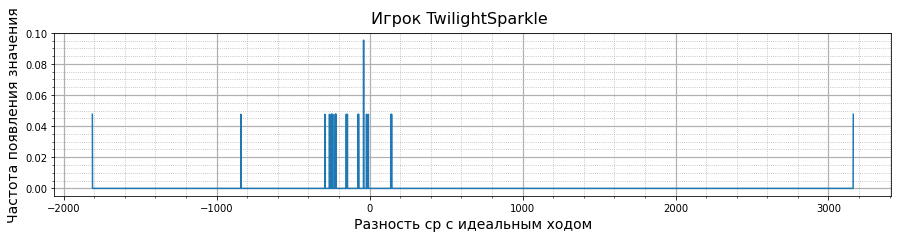

In [38]:
fig, ax = plt.subplots(figsize=(15.,3.))
fig.suptitle("Игрок "+first_name, fontsize=16)
ax.set_xlabel("Разность cp с идеальным ходом", fontsize=14)
ax.set_ylabel("Частота появления значения", fontsize=14)
ax.minorticks_on()
ax.grid(which="major",linewidth=1.2)
ax.grid(which="minor",linestyle = ':')
ax.plot(hd1.keys(), hd1.values())
plt.show()

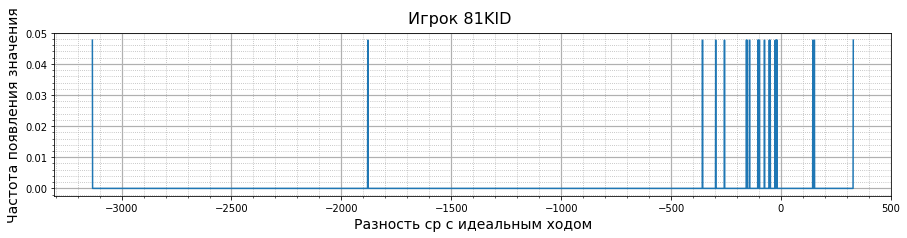

In [39]:
fig, ax = plt.subplots(figsize=(15.,3.))
fig.suptitle("Игрок "+second_name, fontsize=16)
ax.set_xlabel("Разность cp с идеальным ходом", fontsize=14)
ax.set_ylabel("Частота появления значения", fontsize=14)
ax.minorticks_on()
ax.grid(which="major",linewidth=1.2)
ax.grid(which="minor",linestyle = ':')
ax.plot(hd2.keys(), hd2.values())
plt.show()

Все круто. Ну, относительно, на самом деле...

---

Соотнести рейтингам числа от 0 до 39 и посмотреть, как похоже?

> если значения одинаковые, то и места одинаковые и чисел меньше 39

> 0 - последнее место, 39 - самый лучший

In [37]:
n_row = len(matr)
new_matr = pd.DataFrame(data=np.zeros((len(index),len(matr.columns[n_row:]))),
                    index=index,
                    columns=matr.columns[n_row:],
                    dtype=int)


for col in range(n_row,len(matr.columns)):
    d = dict.fromkeys(matr.iloc[:,col])
    i = 0
    for k in sorted(d.keys()):
        d[k] = i
        i += 1
    for i in range(n_row):
        new_matr.iloc[i,col-n_row] = d[matr.iloc[i,col]]

new_matr = new_matr.drop('total count of moves',axis=1)
new_matr = new_matr.sort_values('Elo')
temp = new_matr.Elo
new_matr = new_matr.drop('Elo',axis=1)
new_matr['Elo'] = temp
new_matr = new_matr.drop('Total',axis=1)
new_matr = new_matr.drop('cp up',axis=1)
new_matr = new_matr.drop('cp down',axis=1)
new_matr.index = new_matr.index.astype('string')
new_matr

,Percentage,"cp up count, %","cp down count, %",delta cp with pv_cp,aver cp up,aver cp down,Elo
1330,7,1,15,6,4,4,0
1379,14,5,10,11,2,12,1
1329,2,0,16,2,11,3,2
66,9,6,9,14,15,14,3
1198,0,6,9,25,0,25,4
2032,1,6,9,16,5,16,5
1432,4,10,5,23,16,22,6
407,6,7,7,22,3,24,7
822,5,6,9,19,10,20,8
159,11,12,3,17,6,15,9


In [ ]:
fig, ax = plt.subplots(figsize=(30,13))
fig.suptitle("Сравнение рейтингов", fontsize=16)
ax.set_xlabel("игроки", fontsize=14)
ax.set_ylabel("позиция в рейтинге", fontsize=14)
ax.minorticks_on()
ax.grid(which="major",linewidth=1.2)
ax.grid(which="minor",linestyle = ':')
# ax.scatter(index,game_for_player)
new_matr.plot(ax=ax)
plt.show()

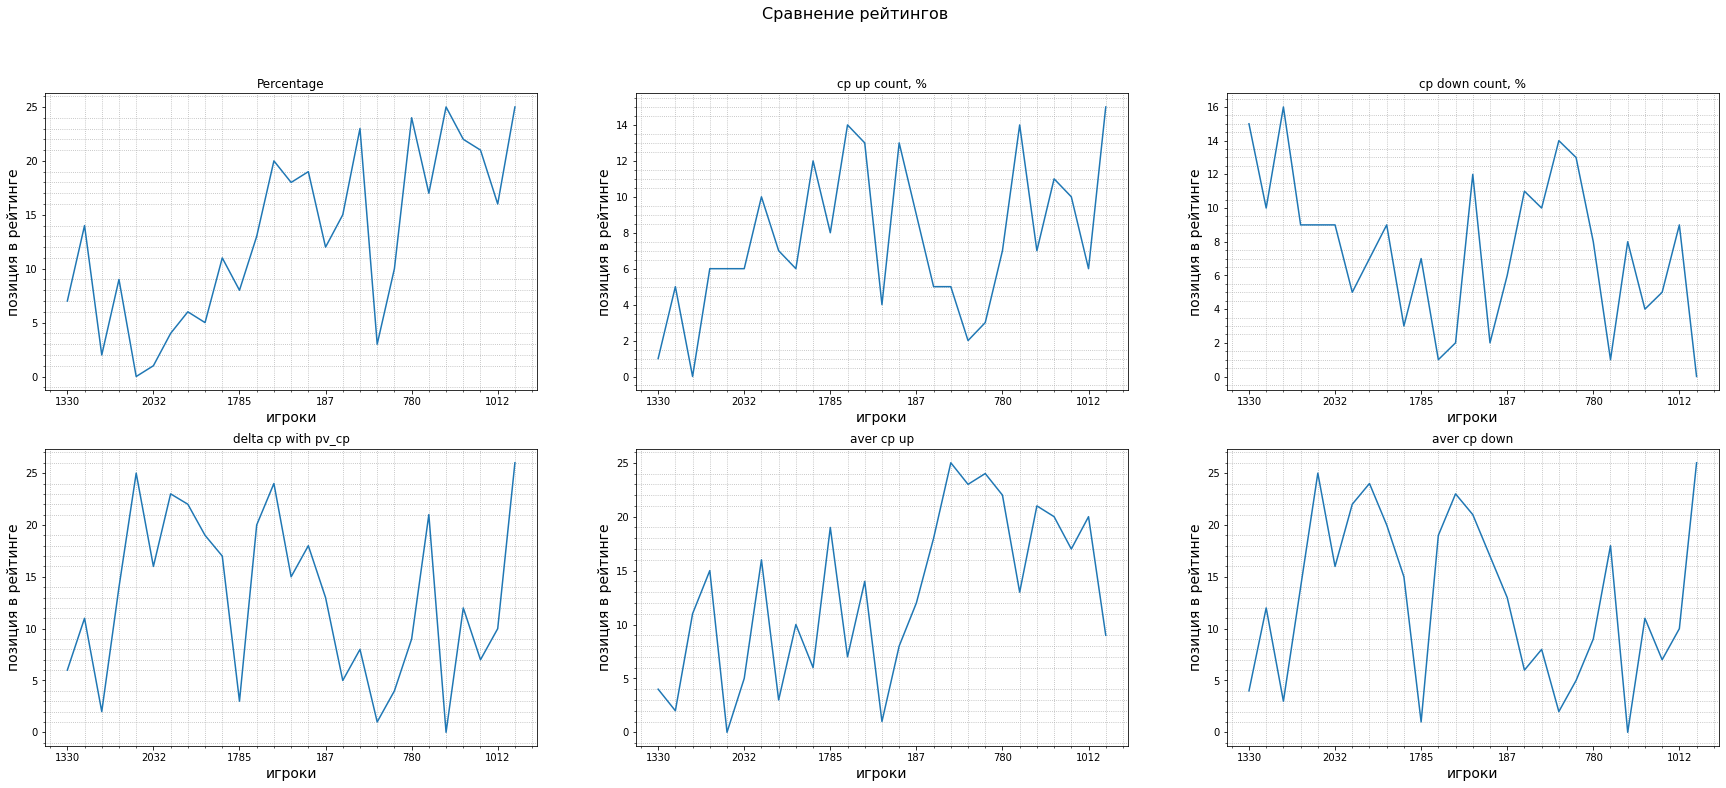

In [39]:
fig, axes = plt.subplots(2,3,figsize=(30,12))
fig.suptitle("Сравнение рейтингов", fontsize=16)
for i in range(2):
    for j in range(3):
        axes[i,j].set_xlabel("игроки", fontsize=14)
        axes[i,j].set_ylabel("позиция в рейтинге", fontsize=14)
        axes[i,j].minorticks_on()
        axes[i,j].grid(which="major",linewidth=1.2)
        axes[i,j].grid(which="minor",linestyle = ':')
        axes[i,j].set_title(new_matr.columns[i*3+j])
        new_matr.iloc[:,i*3+j].plot(ax=axes[i,j])
# plt.savefig('compare.jpg')
plt.show()